In [5]:
from ds_functions import *
from ds_settings import *

random_state = 1

In [25]:
files = [train_file, maxrgb_file, alpha_file, green_yellow_file, colorized_file]

data = get_data(pickle_file, read_pickle=use_pickle)

# Set features and target
features = list(data.columns)[2:]

target = 'class'

max_features = int(np.round(np.sqrt(len(features))))

In [41]:
rf_model = sk_cls(RandomForestClassifier(n_estimators=650, 
                                        max_features=650,
                                        n_jobs=4),
                 data=data, 
                 X=features, y=target, cv=None)
rf_model.run()

Score:
 0.6736842105263158
Classification Report:
                            precision    recall  f1-score   support

              Black-grass       0.60      0.12      0.19        26
                 Charlock       0.82      0.84      0.83        32
                 Cleavers       0.83      0.80      0.81        30
         Common Chickweed       0.66      0.91      0.76        65
             Common wheat       0.80      0.16      0.27        25
                  Fat Hen       0.75      0.82      0.79        51
         Loose Silky-bent       0.49      0.84      0.62        58
                    Maize       0.93      0.57      0.70        23
        Scentless Mayweed       0.56      0.71      0.63        49
          Shepherds Purse       1.00      0.06      0.12        31
Small-flowered Cranesbill       0.69      0.88      0.77        41
               Sugar beet       0.93      0.59      0.72        44

              avg / total       0.73      0.67      0.64       475



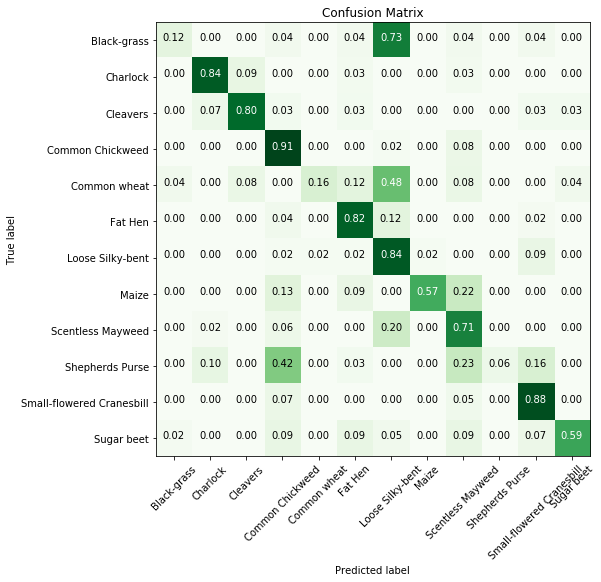

In [42]:
rf_model.show()

In [43]:
rf_cv = sk_cls(RandomForestClassifier(n_estimators=500, 
                                      max_features=max_features, 
                                      n_jobs=2),
                 data=data, 
                 X=features, y=target, cv=6)
rf_cv.run()

JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Nick\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Nick\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000000F8C52BBC00, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Nick\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\N...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000000F8C52BBC00, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Nick\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\N...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\Nick\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\Nick\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop._run_callback(functools.par...00F8CFAAF598>))>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\Nick\Anaconda3\lib\asyncio\events.py in _run(self=<Handle IOLoop._run_callback(functools.par...00F8CFAAF598>))>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method IOLoop._run_callback of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (functools.partial(<function wrap.<locals>.null_wrapper at 0x000000F8CFAAF598>),)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\tornado\ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function wrap.<locals>.null_wrapper at 0x000000F8CFAAF598>))
    754         """Runs a callback with error handling.
    755 
    756         For use in subclasses.
    757         """
    758         try:
--> 759             ret = callback()
        ret = undefined
        callback = functools.partial(<function wrap.<locals>.null_wrapper at 0x000000F8CFAAF598>)
    760             if ret is not None:
    761                 from tornado import gen
    762                 # Functions that return Futures typically swallow all
    763                 # exceptions and store them in the Future.  If a Future

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ()
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in <lambda>()
    531             return
    532 
    533         if state & self.socket.events:
    534             # events still exist that haven't been processed
    535             # explicitly schedule handling to avoid missing events due to edge-triggered FDs
--> 536             self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
    537 
    538     def _init_io_state(self):
    539         """initialize the ioloop event handler"""
    540         with stack_context.NullContext():

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=0)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'rf_cv = sk_cls(RandomForestClassifier(n_estimato...          X=features, y=target, cv=6)\nrf_cv.run()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 23, 18, 52, 15, 442407, tzinfo=tzutc()), 'msg_id': '05a2e02710144bfda1ed53d273d451e3', 'msg_type': 'execute_request', 'session': '9633d02f88bc4a758bb4e2c6eea97c78', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '05a2e02710144bfda1ed53d273d451e3', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'9633d02f88bc4a758bb4e2c6eea97c78']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'rf_cv = sk_cls(RandomForestClassifier(n_estimato...          X=features, y=target, cv=6)\nrf_cv.run()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 23, 18, 52, 15, 442407, tzinfo=tzutc()), 'msg_id': '05a2e02710144bfda1ed53d273d451e3', 'msg_type': 'execute_request', 'session': '9633d02f88bc4a758bb4e2c6eea97c78', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '05a2e02710144bfda1ed53d273d451e3', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'9633d02f88bc4a758bb4e2c6eea97c78'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'rf_cv = sk_cls(RandomForestClassifier(n_estimato...          X=features, y=target, cv=6)\nrf_cv.run()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 23, 18, 52, 15, 442407, tzinfo=tzutc()), 'msg_id': '05a2e02710144bfda1ed53d273d451e3', 'msg_type': 'execute_request', 'session': '9633d02f88bc4a758bb4e2c6eea97c78', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '05a2e02710144bfda1ed53d273d451e3', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='rf_cv = sk_cls(RandomForestClassifier(n_estimato...          X=features, y=target, cv=6)\nrf_cv.run()', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'rf_cv = sk_cls(RandomForestClassifier(n_estimato...          X=features, y=target, cv=6)\nrf_cv.run()'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('rf_cv = sk_cls(RandomForestClassifier(n_estimato...          X=features, y=target, cv=6)\nrf_cv.run()',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('rf_cv = sk_cls(RandomForestClassifier(n_estimato...          X=features, y=target, cv=6)\nrf_cv.run()',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='rf_cv = sk_cls(RandomForestClassifier(n_estimato...          X=features, y=target, cv=6)\nrf_cv.run()', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'rf_cv = sk_cls(RandomForestClassifier(n_estimato...          X=features, y=target, cv=6)\nrf_cv.run()'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='rf_cv = sk_cls(RandomForestClassifier(n_estimato...          X=features, y=target, cv=6)\nrf_cv.run()', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-43-aa7f57ebc53e>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at f8d0384d68, execution...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000000F8CFA78810, file "<ipython-input-43-aa7f57ebc53e>", line 6>
        result = <ExecutionResult object at f8d0384d68, execution...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000000F8CFA78810, file "<ipython-input-43-aa7f57ebc53e>", line 6>, result=<ExecutionResult object at f8d0384d68, execution...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000000F8CFA78810, file "<ipython-input-43-aa7f57ebc53e>", line 6>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'BaseCrossValidator': <class 'sklearn.model_selection._split.BaseCrossValidator'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'GroupKFold': <class 'sklearn.model_selection._split.GroupKFold'>, 'GroupShuffleSplit': <class 'sklearn.model_selection._split.GroupShuffleSplit'>, 'In': ['', 'from ds_functions import *\nfrom ds_settings import *\n\nrandom_state = 1', 'files = [train_file, maxrgb_file, alpha_file, gr..._features = int(np.round(np.sqrt(len(features))))', 'from ds_functions import *\nfrom ds_settings import *\n\nrandom_state = 1', 'from ds_functions import *\nfrom ds_settings import *\n\nrandom_state = 1', 'from ds_functions import *\nfrom ds_settings import *\n\nrandom_state = 1', 'files = [train_file, maxrgb_file, alpha_file, gr..._features = int(np.round(np.sqrt(len(features))))', "load_model(etc_grid, 'etc_grid_cv.pkl_model')", "etc_grid = load_model('etc_grid_cv.pkl_model')", 'import gzip\n\ndef save_model_gzip(model, out_file...compressed\\n")\n#     f.write(b"Not compressed\\n")', 'import gzip\n\ndef save_model(model, out_file, com...compressed\\n")\n#     f.write(b"Not compressed\\n")', "etc_grid = load_model('etc_grid_cv.pkl_model')", 'X_tr, X_ts, y_tr, y_ts = train_test_split(data.i...sqrt(len(features)) * i)) for i in [0.8, 1, 1.2]]', 'print(etc_grid.best_score_)\nprint(etc_grid.best_...e=True)\nplt.show()\n# save the grid search results', "save_model_gzip(etc_grid, 'etc_grid.pkl.gz')", "save_model_gzip(etc_grid, 'etc_grid.pkl.gz', compressed=False)", 'import gzip\n\ndef save_model(model, out_file, com...ret = pickle.load(f)\n    f.close()\n    return ret', "save_model_gzip(etc_grid, 'etc_grid.pkl.gz', compressed=False)", "save_model(etc_grid, 'etc_grid.pkl.gz', compressed=False)", "save_model(etc_grid, 'etc_grid.pkl.gz', compressed=True)", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LeaveOneGroupOut': <class 'sklearn.model_selection._split.LeaveOneGroupOut'>, ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'BaseCrossValidator': <class 'sklearn.model_selection._split.BaseCrossValidator'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'GroupKFold': <class 'sklearn.model_selection._split.GroupKFold'>, 'GroupShuffleSplit': <class 'sklearn.model_selection._split.GroupShuffleSplit'>, 'In': ['', 'from ds_functions import *\nfrom ds_settings import *\n\nrandom_state = 1', 'files = [train_file, maxrgb_file, alpha_file, gr..._features = int(np.round(np.sqrt(len(features))))', 'from ds_functions import *\nfrom ds_settings import *\n\nrandom_state = 1', 'from ds_functions import *\nfrom ds_settings import *\n\nrandom_state = 1', 'from ds_functions import *\nfrom ds_settings import *\n\nrandom_state = 1', 'files = [train_file, maxrgb_file, alpha_file, gr..._features = int(np.round(np.sqrt(len(features))))', "load_model(etc_grid, 'etc_grid_cv.pkl_model')", "etc_grid = load_model('etc_grid_cv.pkl_model')", 'import gzip\n\ndef save_model_gzip(model, out_file...compressed\\n")\n#     f.write(b"Not compressed\\n")', 'import gzip\n\ndef save_model(model, out_file, com...compressed\\n")\n#     f.write(b"Not compressed\\n")', "etc_grid = load_model('etc_grid_cv.pkl_model')", 'X_tr, X_ts, y_tr, y_ts = train_test_split(data.i...sqrt(len(features)) * i)) for i in [0.8, 1, 1.2]]', 'print(etc_grid.best_score_)\nprint(etc_grid.best_...e=True)\nplt.show()\n# save the grid search results', "save_model_gzip(etc_grid, 'etc_grid.pkl.gz')", "save_model_gzip(etc_grid, 'etc_grid.pkl.gz', compressed=False)", 'import gzip\n\ndef save_model(model, out_file, com...ret = pickle.load(f)\n    f.close()\n    return ret', "save_model_gzip(etc_grid, 'etc_grid.pkl.gz', compressed=False)", "save_model(etc_grid, 'etc_grid.pkl.gz', compressed=False)", "save_model(etc_grid, 'etc_grid.pkl.gz', compressed=True)", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LeaveOneGroupOut': <class 'sklearn.model_selection._split.LeaveOneGroupOut'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
E:\git-repos\plant-seedlings\<ipython-input-43-aa7f57ebc53e> in <module>()
      1 rf_cv = sk_cls(RandomForestClassifier(n_estimators=500, 
      2                                       max_features=max_features, 
      3                                       n_jobs=2),
      4                  data=data, 
      5                  X=features, y=target, cv=6)
----> 6 rf_cv.run()

...........................................................................
E:\git-repos\plant-seedlings\ds_functions.py in run(self=<ds_functions.sk_cls object>)
    187             cr = classification_report(y_train, y_pred)
    188             cm = confusion_matrix(y_train, y_pred)
    189             
    190         results = {
    191             'cls':cls,
--> 192             'sc':sc,
    193             'cm':cm,
    194             'cr':cr,
    195             'y_pred':y_pred
    196         }

...........................................................................
E:\git-repos\plant-seedlings\ds_functions.py in train_cls(self=<ds_functions.sk_cls object>, cls=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X_train=      px1_x  px1_x  px2_x  px2_x  px3_x  px3_x  ...   177        255  

[4275 rows x 735000 columns], X_test=      px1_x  px1_x  px2_x  px2_x  px3_x  px3_x  ...    150        218  

[475 rows x 735000 columns], y_train=1758                 Common wheat
3771          ...Charlock
Name: class, Length: 4275, dtype: object, y_test=935                      Cleavers
3322          ...ilky-bent
Name: class, Length: 475, dtype: object)
    169         self.__X_train, self.__X_test, self.__y_train, self.__y_test = train_test_split(
    170             data[self.__ftr],
    171             data[self.__tgt], test_size=ratio)
    172     
    173     def train_cls(self, cls, X_train, X_test, y_train, y_test):
--> 174         """Fir the model and """
    175         if self.__cv == None:
    176             # until I can figure out why I'm getting NAs I'll use fillna
    177             cls.fit(X_train.fillna(0), y_train)
    178             y_pred = cls.predict(X_test)

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in cross_val_predict(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=      px1_x  px1_x  px2_x  px2_x  px3_x  px3_x  ...   150        218  

[4750 rows x 735000 columns], y=1758                 Common wheat
3771          ...lky-bent
Name: class, Length: 4750, dtype: object, groups=None, cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False), n_jobs=2, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', method='predict')
    675     # independent, and that it is pickle-able.
    676     parallel = Parallel(n_jobs=n_jobs, verbose=verbose,
    677                         pre_dispatch=pre_dispatch)
    678     prediction_blocks = parallel(delayed(_fit_and_predict)(
    679         clone(estimator), X, y, train, test, verbose, fit_params, method)
--> 680         for train, test in cv.split(X, y, groups))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=6, random_state=None, shuffle=False)>
        X =       px1_x  px1_x  px2_x  px2_x  px3_x  px3_x  ...   150        218  

[4750 rows x 735000 columns]
        y = 1758                 Common wheat
3771          ...lky-bent
Name: class, Length: 4750, dtype: object
        groups = None
    681 
    682     # Concatenate the predictions
    683     predictions = [pred_block_i for pred_block_i, _ in prediction_blocks]
    684     test_indices = np.concatenate([indices_i

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object cross_val_predict.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Mon Apr 23 11:59:58 2018
PID: 19284                 Python 3.6.5: C:\Users\Nick\Anaconda3\python.exe
...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_predict>, (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False),       px1_x  px1_x  px2_x  px2_x  px3_x  px3_x  ...   150        218  

[4750 rows x 735000 columns], 1758                 Common wheat
3771          ...lky-bent
Name: class, Length: 4750, dtype: object, array([ 514,  568,  615, ..., 4747, 4748, 4749]), array([   0,    1,    2,    3,    4,    5,    6,... 917,  919,  934,  943,
        959,  998, 1004]), 0, None, 'predict'), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_predict>
        args = (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False),       px1_x  px1_x  px2_x  px2_x  px3_x  px3_x  ...   150        218  

[4750 rows x 735000 columns], 1758                 Common wheat
3771          ...lky-bent
Name: class, Length: 4750, dtype: object, array([ 514,  568,  615, ..., 4747, 4748, 4749]), array([   0,    1,    2,    3,    4,    5,    6,... 917,  919,  934,  943,
        959,  998, 1004]), 0, None, 'predict')
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_predict(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=      px1_x  px1_x  px2_x  px2_x  px3_x  px3_x  ...   150        218  

[4750 rows x 735000 columns], y=1758                 Common wheat
3771          ...lky-bent
Name: class, Length: 4750, dtype: object, train=array([ 514,  568,  615, ..., 4747, 4748, 4749]), test=array([   0,    1,    2,    3,    4,    5,    6,... 917,  919,  934,  943,
        959,  998, 1004]), verbose=0, fit_params={}, method='predict')
    742     # Adjust length of sample weights
    743     fit_params = fit_params if fit_params is not None else {}
    744     fit_params = dict([(k, _index_param_value(X, v, train))
    745                       for k, v in fit_params.items()])
    746 
--> 747     X_train, y_train = _safe_split(estimator, X, y, train)
        X_train = undefined
        y_train = undefined
        estimator = RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False)
        X =       px1_x  px1_x  px2_x  px2_x  px3_x  px3_x  ...   150        218  

[4750 rows x 735000 columns]
        y = 1758                 Common wheat
3771          ...lky-bent
Name: class, Length: 4750, dtype: object
        train = array([ 514,  568,  615, ..., 4747, 4748, 4749])
    748     X_test, _ = _safe_split(estimator, X, y, test, train)
    749 
    750     if y_train is None:
    751         estimator.fit(X_train, **fit_params)

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py in _safe_split(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=      px1_x  px1_x  px2_x  px2_x  px3_x  px3_x  ...   150        218  

[4750 rows x 735000 columns], y=1758                 Common wheat
3771          ...lky-bent
Name: class, Length: 4750, dtype: object, indices=array([ 514,  568,  615, ..., 4747, 4748, 4749]), train_indices=None)
    195         if train_indices is None:
    196             X_subset = X[np.ix_(indices, indices)]
    197         else:
    198             X_subset = X[np.ix_(indices, train_indices)]
    199     else:
--> 200         X_subset = safe_indexing(X, indices)
        X_subset = undefined
        X =       px1_x  px1_x  px2_x  px2_x  px3_x  px3_x  ...   150        218  

[4750 rows x 735000 columns]
        indices = array([ 514,  568,  615, ..., 4747, 4748, 4749])
    201 
    202     if y is not None:
    203         y_subset = safe_indexing(y, indices)
    204     else:

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\utils\__init__.py in safe_indexing(X=      px1_x  px1_x  px2_x  px2_x  px3_x  px3_x  ...   150        218  

[4750 rows x 735000 columns], indices=array([ 514,  568,  615, ..., 4747, 4748, 4749]))
    144     if hasattr(X, "iloc"):
    145         # Work-around for indexing with read-only indices in pandas
    146         indices = indices if indices.flags.writeable else indices.copy()
    147         # Pandas Dataframes and Series
    148         try:
--> 149             return X.iloc[indices]
        X.iloc = <pandas.core.indexing._iLocIndexer object>
        indices = array([ 514,  568,  615, ..., 4747, 4748, 4749])
    150         except ValueError:
    151             # Cython typed memoryviews internally used in pandas do not support
    152             # readonly buffers.
    153             warnings.warn("Copying input dataframe for slicing.",

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\indexing.py in __getitem__(self=<pandas.core.indexing._iLocIndexer object>, key=array([ 514,  568,  615, ..., 4747, 4748, 4749]))
   1368         else:
   1369             # we by definition only have the 0th axis
   1370             axis = self.axis or 0
   1371 
   1372             maybe_callable = com._apply_if_callable(key, self.obj)
-> 1373             return self._getitem_axis(maybe_callable, axis=axis)
        self._getitem_axis = <bound method _iLocIndexer._getitem_axis of <pandas.core.indexing._iLocIndexer object>>
        maybe_callable = array([ 514,  568,  615, ..., 4747, 4748, 4749])
        axis = 0
   1374 
   1375     def _is_scalar_access(self, key):
   1376         raise NotImplementedError()
   1377 

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\indexing.py in _getitem_axis(self=<pandas.core.indexing._iLocIndexer object>, key=array([ 514,  568,  615, ..., 4747, 4748, 4749]), axis=0)
   1814             self._has_valid_type(key, axis)
   1815             return self._getbool_axis(key, axis=axis)
   1816 
   1817         # a list of integers
   1818         elif is_list_like_indexer(key):
-> 1819             return self._get_list_axis(key, axis=axis)
        self._get_list_axis = <bound method _iLocIndexer._get_list_axis of <pandas.core.indexing._iLocIndexer object>>
        key = array([ 514,  568,  615, ..., 4747, 4748, 4749])
        axis = 0
   1820 
   1821         # a single integer
   1822         else:
   1823             key = self._convert_scalar_indexer(key, axis)

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\indexing.py in _get_list_axis(self=<pandas.core.indexing._iLocIndexer object>, key=array([ 514,  568,  615, ..., 4747, 4748, 4749]), axis=0)
   1789         Series object
   1790         """
   1791         if axis is None:
   1792             axis = self.axis or 0
   1793         try:
-> 1794             return self.obj._take(key, axis=axis, convert=False)
        self.obj._take = <bound method NDFrame._take of       px1_x  px1_...  150        218  

[4750 rows x 735000 columns]>
        key = array([ 514,  568,  615, ..., 4747, 4748, 4749])
        axis = 0
   1795         except IndexError:
   1796             # re-raise with different error message
   1797             raise IndexError("positional indexers are out-of-bounds")
   1798 

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\generic.py in _take(self=      px1_x  px1_x  px2_x  px2_x  px3_x  px3_x  ...   150        218  

[4750 rows x 735000 columns], indices=array([ 514,  568,  615, ..., 4747, 4748, 4749]), axis=0, convert=False, is_copy=True)
   2145         if convert:
   2146             indices = maybe_convert_indices(indices, len(self._get_axis(axis)))
   2147 
   2148         new_data = self._data.take(indices,
   2149                                    axis=self._get_block_manager_axis(axis),
-> 2150                                    verify=True)
   2151         result = self._constructor(new_data).__finalize__(self)
   2152 
   2153         # Maybe set copy if we didn't actually change the index.
   2154         if is_copy:

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\internals.py in take(self=BlockManager
Items: Index(['px1_x', 'px1_x', 'px... slice(0, 735000, 1), 735000 x 4750, dtype: uint8, indexer=array([ 514,  568,  615, ..., 4747, 4748, 4749], dtype=int64), axis=1, verify=True, convert=True)
   4259                 raise Exception('Indices must be nonzero and less than '
   4260                                 'the axis length')
   4261 
   4262         new_labels = self.axes[axis].take(indexer)
   4263         return self.reindex_indexer(new_axis=new_labels, indexer=indexer,
-> 4264                                     axis=axis, allow_dups=True)
        axis = 1
   4265 
   4266     def merge(self, other, lsuffix='', rsuffix=''):
   4267         if not self._is_indexed_like(other):
   4268             raise AssertionError('Must have same axes to merge managers')

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\internals.py in reindex_indexer(self=BlockManager
Items: Index(['px1_x', 'px1_x', 'px... slice(0, 735000, 1), 735000 x 4750, dtype: uint8, new_axis=Int64Index([3638, 3801, 3668, 3854,   54, 3779, ...04, 2772],
           dtype='int64', length=3955), indexer=array([ 514,  568,  615, ..., 4747, 4748, 4749], dtype=int64), axis=1, fill_value=None, allow_dups=True, copy=True)
   4145             new_blocks = self._slice_take_blocks_ax0(indexer,
   4146                                                      fill_tuple=(fill_value,))
   4147         else:
   4148             new_blocks = [blk.take_nd(indexer, axis=axis, fill_tuple=(
   4149                 fill_value if fill_value is not None else blk.fill_value,))
-> 4150                 for blk in self.blocks]
        self.blocks = (IntBlock: slice(0, 735000, 1), 735000 x 4750, dtype: uint8,)
   4151 
   4152         new_axes = list(self.axes)
   4153         new_axes[axis] = new_axis
   4154         return self.__class__(new_blocks, new_axes)

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\internals.py in <listcomp>(.0=<tuple_iterator object>)
   4145             new_blocks = self._slice_take_blocks_ax0(indexer,
   4146                                                      fill_tuple=(fill_value,))
   4147         else:
   4148             new_blocks = [blk.take_nd(indexer, axis=axis, fill_tuple=(
   4149                 fill_value if fill_value is not None else blk.fill_value,))
-> 4150                 for blk in self.blocks]
        blk = IntBlock: slice(0, 735000, 1), 735000 x 4750, dtype: uint8
   4151 
   4152         new_axes = list(self.axes)
   4153         new_axes[axis] = new_axis
   4154         return self.__class__(new_blocks, new_axes)

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\internals.py in take_nd(self=IntBlock: slice(0, 735000, 1), 735000 x 4750, dtype: uint8, indexer=array([ 514,  568,  615, ..., 4747, 4748, 4749], dtype=int64), axis=1, new_mgr_locs=None, fill_tuple=(nan,))
   1216             new_values = algos.take_nd(values, indexer, axis=axis,
   1217                                        allow_fill=False)
   1218         else:
   1219             fill_value = fill_tuple[0]
   1220             new_values = algos.take_nd(values, indexer, axis=axis,
-> 1221                                        allow_fill=True, fill_value=fill_value)
        fill_value = nan
   1222 
   1223         if new_mgr_locs is None:
   1224             if axis == 0:
   1225                 slc = lib.indexer_as_slice(indexer)

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\algorithms.py in take_nd(arr=memmap([[ 57,  51,  32, ...,  45,  21,  66],
   ...255, 253, 218, ..., 218, 255, 218]], dtype=uint8), indexer=array([ 514,  568,  615, ..., 4747, 4748, 4749], dtype=int64), axis=1, out=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0,...0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), fill_value=0, mask_info=(array([False, False, False, ..., False, False, False]), False), allow_fill=True)
   1378         else:
   1379             out = np.empty(out_shape, dtype=dtype)
   1380 
   1381     func = _get_take_nd_function(arr.ndim, arr.dtype, out.dtype, axis=axis,
   1382                                  mask_info=mask_info)
-> 1383     func(arr, indexer, out, fill_value)
        func = <function _get_take_nd_function.<locals>.func>
        arr = memmap([[ 57,  51,  32, ...,  45,  21,  66],
   ...255, 253, 218, ..., 218, 255, 218]], dtype=uint8)
        indexer = array([ 514,  568,  615, ..., 4747, 4748, 4749], dtype=int64)
        out = array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0,...0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
        fill_value = 0
   1384 
   1385     if flip_order:
   1386         out = out.T
   1387     return out

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\algorithms.py in func(arr=memmap([[ 57,  51,  32, ...,  45,  21,  66],
   ...255, 253, 218, ..., 218, 255, 218]], dtype=uint8), indexer=array([ 514,  568,  615, ..., 4747, 4748, 4749], dtype=int64), out=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0,...0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), fill_value=0)
   1277             return func
   1278 
   1279     def func(arr, indexer, out, fill_value=np.nan):
   1280         indexer = _ensure_int64(indexer)
   1281         _take_nd_object(arr, indexer, out, axis=axis, fill_value=fill_value,
-> 1282                         mask_info=mask_info)
   1283 
   1284     return func
   1285 
   1286 

...........................................................................
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\algorithms.py in _take_nd_object(arr=memmap([[ 57,  51,  32, ...,  45,  21,  66],
   ...255, 253, 218, ..., 218, 255, 218]], dtype=uint8), indexer=array([ 514,  568,  615, ..., 4747, 4748, 4749], dtype=int64), out=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0,...0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), axis=1, fill_value=0, mask_info=(array([False, False, False, ..., False, False, False]), False))
   1134         mask = indexer == -1
   1135         needs_masking = mask.any()
   1136     if arr.dtype != out.dtype:
   1137         arr = arr.astype(out.dtype)
   1138     if arr.shape[axis] > 0:
-> 1139         arr.take(_ensure_platform_int(indexer), axis=axis, out=out)
        arr.take = <built-in method take of memmap object>
        indexer = array([ 514,  568,  615, ..., 4747, 4748, 4749], dtype=int64)
        axis = 1
        out = array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0,...0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
   1140     if needs_masking:
   1141         outindexer = [slice(None)] * arr.ndim
   1142         outindexer[axis] = mask
   1143         out[tuple(outindexer)] = fill_value

MemoryError: 
___________________________________________________________________________

In [ ]:
rf_cv.show()

In [50]:
X_tr, X_ts, y_tr, y_ts = train_test_split(data.iloc[:, 2:], 
                                          data.iloc[:, 0], 
                                          test_size=0.1, 
                                          random_state=random_state)

In [52]:
# I'll also try a grid search 

max_feat = [int(np.round(np.sqrt(len(features)) * i)) for i in [1, 1.25]]

params = {
    'n_estimators':[600, 700], 
    'max_features': max_feat, 
    'n_jobs':[4],
    'min_samples_leaf':[1,2,3]
}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=4)

In [53]:
rf_grid.fit(X_tr, y_tr)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [600, 700], 'max_features': [606, 758], 'n_jobs': [4], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

0.7061988304093567
{'max_features': 606, 'min_samples_leaf': 1, 'n_estimators': 600, 'n_jobs': 4}
                           precision    recall  f1-score   support

              Black-grass       0.86      0.17      0.29        35
                 Charlock       0.80      0.83      0.81        29
                 Cleavers       0.85      0.77      0.81        30
         Common Chickweed       0.66      0.91      0.76        67
             Common wheat       1.00      0.12      0.21        25
                  Fat Hen       0.61      0.77      0.68        39
         Loose Silky-bent       0.51      0.93      0.66        61
                    Maize       0.92      0.60      0.73        20
        Scentless Mayweed       0.71      0.70      0.71        57
          Shepherds Purse       0.50      0.07      0.12        15
Small-flowered Cranesbill       0.91      0.85      0.88        59
               Sugar beet       0.86      0.66      0.75        38

              avg / total    

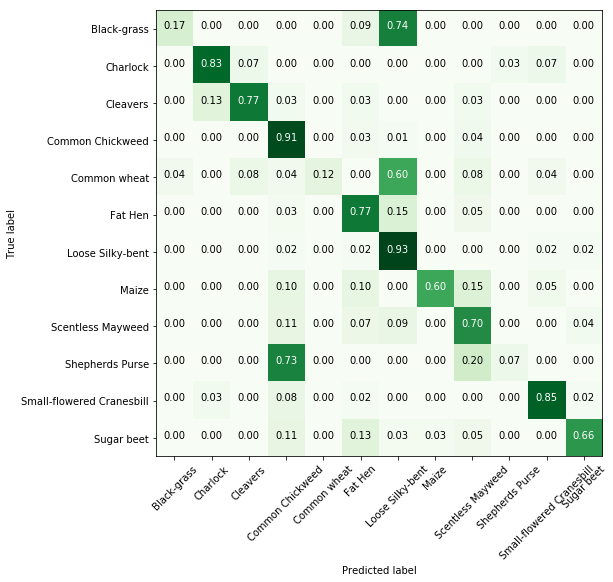

In [54]:

print(rf_grid.best_score_)
print(rf_grid.best_params_)
result = rf_grid.cv_results_
grid_pred = rf_grid.best_estimator_.predict(X_ts)
print(classification_report(y_ts, grid_pred))
score = accuracy_score(y_ts, grid_pred)
print(score)
cm_plot(confusion_matrix(y_ts, grid_pred), classes=sorted(data['class'].unique()), 
       cmap=plt.cm.Greens, cbar=False, normalize=True)
plt.show()
# save the grid search results


In [55]:
# That's pretty good. i'll save this model.

rf_pkl_filename = 'rf_grid_cv.pkl_model'
    
save_model(rf_grid, rf_pkl_filename)

In [3]:
etc_model = sk_cls(ExtraTreesClassifier(n_estimators=600, 
                                      max_features=700, 
                                      n_jobs=4),
                 data=data, 
                 X=features, y=target, cv=None)
etc_model.run()

Score:
 0.7221052631578947
Classification Report:
                            precision    recall  f1-score   support

              Black-grass       0.56      0.18      0.27        28
                 Charlock       0.87      0.82      0.85        40
                 Cleavers       0.88      0.90      0.89        31
         Common Chickweed       0.74      0.94      0.83        52
             Common wheat       0.83      0.20      0.32        25
                  Fat Hen       0.71      0.84      0.77        43
         Loose Silky-bent       0.61      0.88      0.72        74
                    Maize       0.92      0.55      0.69        22
        Scentless Mayweed       0.56      0.59      0.58        54
          Shepherds Purse       1.00      0.33      0.50        24
Small-flowered Cranesbill       0.78      0.98      0.87        46
               Sugar beet       0.83      0.69      0.76        36

              avg / total       0.74      0.72      0.70       475



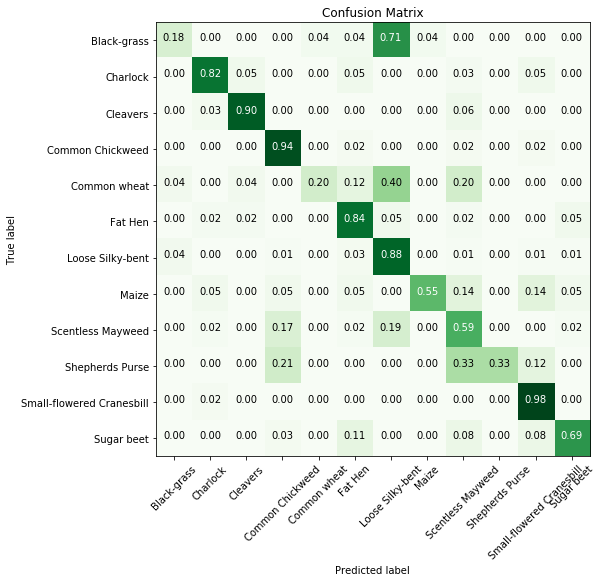

In [6]:
etc_model.show()

In [12]:
X_tr, X_ts, y_tr, y_ts = train_test_split(data.iloc[:, 2:], 
                                          data.iloc[:, 0], 
                                          test_size=0.1, 
                                          random_state=random_state)

max_feat = [int(np.round(np.sqrt(len(features)) * i)) for i in [0.8, 1, 1.2]]

In [26]:
# attempt a grid search using ETC

params = {
    'n_estimators':[600, 750, 900], 
    'max_features': max_feat, 
    'n_jobs':[4]
}

# similar grid search setup to RF. Use 5-fold cross-validation

etc_grid = GridSearchCV(ExtraTreesClassifier(), param_grid=params, cv=5)

In [27]:
etc_grid.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [600, 750, 900], 'max_features': [485, 606, 727], 'n_jobs': [4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

0.7256140350877193
{'max_features': 727, 'n_estimators': 900, 'n_jobs': 4}
                           precision    recall  f1-score   support

              Black-grass       0.83      0.14      0.24        35
                 Charlock       0.77      0.93      0.84        29
                 Cleavers       0.92      0.73      0.81        30
         Common Chickweed       0.70      0.96      0.81        67
             Common wheat       0.67      0.16      0.26        25
                  Fat Hen       0.70      0.79      0.75        39
         Loose Silky-bent       0.49      0.93      0.64        61
                    Maize       0.93      0.65      0.76        20
        Scentless Mayweed       0.79      0.65      0.71        57
          Shepherds Purse       0.71      0.33      0.45        15
Small-flowered Cranesbill       0.93      0.85      0.88        59
               Sugar beet       0.93      0.71      0.81        38

              avg / total       0.77      0.72      

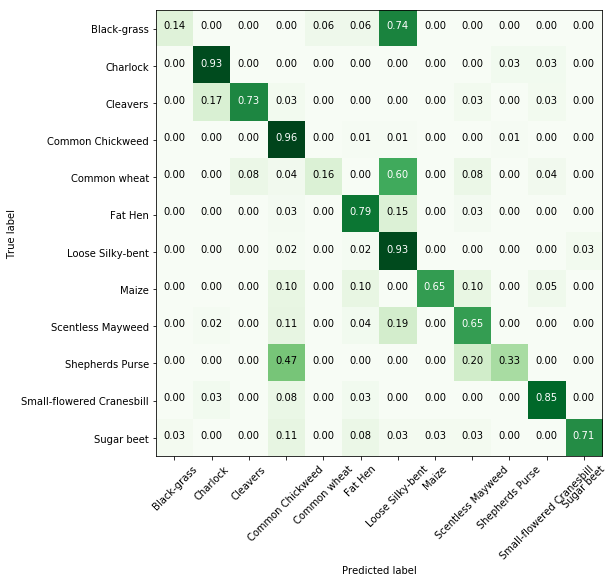

In [28]:
print(etc_grid.best_score_)
print(etc_grid.best_params_)
result = etc_grid.cv_results_

grid_etc_pred = etc_grid.best_estimator_.predict(X_ts)
cr = classification_report(y_ts, grid_etc_pred)
print(cr)

score = accuracy_score(y_ts, grid_etc_pred)
print(score)

cm = confusion_matrix(y_ts, grid_etc_pred)
cm_plot(confusion_matrix(y_ts, grid_etc_pred), classes=sorted(data['class'].unique()), 
       cmap=plt.cm.Greens, cbar=False, normalize=True)
plt.show()
# save the grid search results


In [40]:
# save the results

save_pickle(obj=etc_grid, out_file='./pickled_data/etc_grid.pkl.bz2', zip_class=bz2)
save_pickle(obj=rf_grid, out_file='./pickled_data/rf_grid.pkl.bz2', zip_class=bz2)